# Feature Extraction

## Set up

In [1]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import networkx as nx

PATH = Path.cwd().parents[0]

from utils.feature_extraction.bytecode import build_bytecode_feature_dataframe
from utils.feature_extraction.transaction import save_txn_feature_dataframe
from utils.feature_extraction.graph import generate_control_flow_graphs, generate_transaction_graphs, save_graph_features
from utils.feature_extraction.sourcecode import build_sol_feature_dataframe

MODEL_PATH = os.path.join(PATH, 'backend/models')

ModuleNotFoundError: No module named 'bytecode'

## Bytecode

In [2]:
LABEL_PATH = os.path.join(PATH, 'data/labeled')
HEX_PATH = os.path.join(LABEL_PATH, 'hex')
bytecode_df, _ = build_bytecode_feature_dataframe(HEX_PATH, MODEL_PATH)

invalid instruction: PUSH30
invalid instruction: PUSH16
invalid instruction: PUSH30
invalid instruction: PUSH28
invalid instruction: PUSH30
invalid instruction: PUSH17
invalid instruction: PUSH31
invalid instruction: PUSH14
invalid instruction: PUSH28
invalid instruction: PUSH30
invalid instruction: PUSH30
invalid instruction: PUSH24
invalid instruction: PUSH27
invalid instruction: PUSH30
invalid instruction: PUSH27
invalid instruction: PUSH24
invalid instruction: PUSH30
invalid instruction: PUSH16
invalid instruction: PUSH23
invalid instruction: PUSH8
invalid instruction: PUSH17
invalid instruction: PUSH8
invalid instruction: PUSH15
invalid instruction: PUSH5
invalid instruction: PUSH10
invalid instruction: PUSH32
invalid instruction: PUSH23
invalid instruction: PUSH17
invalid instruction: PUSH19
invalid instruction: PUSH13
invalid instruction: PUSH32
invalid instruction: PUSH27
invalid instruction: PUSH29
invalid instruction: PUSH31
invalid instruction: PUSH26
invalid instruction: PU

In [3]:
bytecode_df.head()

,opcode_entropy,byte_entropy,byte_0x,byte_60,byte_80,byte_40,byte_52,byte_04,byte_36,byte_10,...,push3 jump,iszero push3,push3 jump jumpdest,iszero push3 jumpi,push3 jumpi push1,jump jumpdest push3,push2 push1 dup4,unknown_0x5f dup1,stop stop,stop stop stop
Address,,,,,,,,,,,,,,,,,,,,,
0x8275ebf521dc217aa79c88132017a5bcef001dd9,4.676922,4.331572,0.000160,0.061938,0.028081,0.007542,0.018453,0.005777,0.001605,0.002246,...,0,0,0,0,0,0,0,0,2,2
0x292e89d5d5bdab3af2f5838c194c1983f0140b43,4.655586,6.067508,0.000280,0.117021,0.021837,0.017077,0.033035,0.012318,0.002800,0.003080,...,5,1,2,1,0,1,0,0,1,0
0x2753dce37a7edb052a77832039bcc9aa49ad8b25,4.622489,6.275986,0.000158,0.105847,0.019490,0.012518,0.029789,0.013469,0.003961,0.003486,...,8,0,0,0,0,0,1,0,1,0
0xe1a0ce8b94c6a5e4791401086763d7bd0a6c18f5,4.808809,5.868159,0.000393,0.106007,0.036121,0.017668,0.032195,0.010993,0.003141,0.005497,...,9,0,2,0,0,0,0,0,1,0
0x9db8a10c7fe60d84397860b3af2e686d4f90c2b7,4.810756,6.076166,0.000135,0.109883,0.033437,0.016449,0.034515,0.008494,0.002831,0.006876,...,17,1,6,1,2,5,0,0,1,0


In [4]:
bytecode_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, 0x8275ebf521dc217aa79c88132017a5bcef001dd9 to 0x17e65e6b9b166fb8e7c59432f0db126711246bc0
Columns: 1259 entries, opcode_entropy to stop stop stop
dtypes: float64(259), int64(1000)
memory usage: 1.5+ MB


In [5]:
bytecode_df.select_dtypes(include=['object'])

""
Address
0x8275ebf521dc217aa79c88132017a5bcef001dd9
0x292e89d5d5bdab3af2f5838c194c1983f0140b43
0x2753dce37a7edb052a77832039bcc9aa49ad8b25
0xe1a0ce8b94c6a5e4791401086763d7bd0a6c18f5
0x9db8a10c7fe60d84397860b3af2e686d4f90c2b7
...
0xee45e37e2b73e86c709d9edd1c8ea3b0ec72dad3
0xb504035a11e672e12a099f32b1672b9c4a78b22f
0x5927b72440d8a8b8c6ca5a8be60e88975f9063fc


In [6]:
bytecode_df.isnull().sum().sort_values(ascending=False)

stop stop stop    0
opcode_entropy    0
byte_entropy      0
byte_0x           0
byte_60           0
                 ..
byte_35           0
byte_7c           0
byte_01           0
byte_90           0
byte_63           0
Length: 1259, dtype: int64

In [7]:
bytecode_df.head()

,opcode_entropy,byte_entropy,byte_0x,byte_60,byte_80,byte_40,byte_52,byte_04,byte_36,byte_10,...,push3 jump,iszero push3,push3 jump jumpdest,iszero push3 jumpi,push3 jumpi push1,jump jumpdest push3,push2 push1 dup4,unknown_0x5f dup1,stop stop,stop stop stop
Address,,,,,,,,,,,,,,,,,,,,,
0x8275ebf521dc217aa79c88132017a5bcef001dd9,4.676922,4.331572,0.000160,0.061938,0.028081,0.007542,0.018453,0.005777,0.001605,0.002246,...,0,0,0,0,0,0,0,0,2,2
0x292e89d5d5bdab3af2f5838c194c1983f0140b43,4.655586,6.067508,0.000280,0.117021,0.021837,0.017077,0.033035,0.012318,0.002800,0.003080,...,5,1,2,1,0,1,0,0,1,0
0x2753dce37a7edb052a77832039bcc9aa49ad8b25,4.622489,6.275986,0.000158,0.105847,0.019490,0.012518,0.029789,0.013469,0.003961,0.003486,...,8,0,0,0,0,0,1,0,1,0
0xe1a0ce8b94c6a5e4791401086763d7bd0a6c18f5,4.808809,5.868159,0.000393,0.106007,0.036121,0.017668,0.032195,0.010993,0.003141,0.005497,...,9,0,2,0,0,0,0,0,1,0
0x9db8a10c7fe60d84397860b3af2e686d4f90c2b7,4.810756,6.076166,0.000135,0.109883,0.033437,0.016449,0.034515,0.008494,0.002831,0.006876,...,17,1,6,1,2,5,0,0,1,0


In [8]:
bytecode_df.to_csv(os.path.join(LABEL_PATH, 'bytecode_feature.csv'))

### Graphs

In [9]:
graphs = generate_control_flow_graphs(os.path.join(LABEL_PATH, 'hex'))

processing 0x8275ebf521dc217aa79c88132017a5bcef001dd9 into graphs
processing 0x292e89d5d5bdab3af2f5838c194c1983f0140b43 into graphs
processing 0x2753dce37a7edb052a77832039bcc9aa49ad8b25 into graphs
processing 0xe1a0ce8b94c6a5e4791401086763d7bd0a6c18f5 into graphs
processing 0x9db8a10c7fe60d84397860b3af2e686d4f90c2b7 into graphs
processing 0x50c6ec50a89a946c5886aeb54a22fe732558f7d1 into graphs
processing 0xf6962cfe3b9618374097d51bc6691efb3974d06f into graphs
processing 0x666c549f5a01167f1aa19bb68be552441f520895 into graphs
processing 0x76bc9e61a1904b82cbf70d1fd9c0f8a120483bbb into graphs
processing 0x10cc060f6f9b2e5dcdb23f1361e4b368a7daec73 into graphs
processing 0xa99f34b4672ff3a9837fd93dea375ccfbb83c89a into graphs
processing 0x17e5f19d430788323863c6798ecd762a40de29f5 into graphs
processing 0x862ba4ae01bdb9dd69877976eefccc267b5b7b82 into graphs
processing 0xd989b2df7d86613ea440ffa33394dc7ba48d6c31 into graphs
processing 0xf944d7740c0caf725bf26cf29e3facf6748189ac into graphs
processing

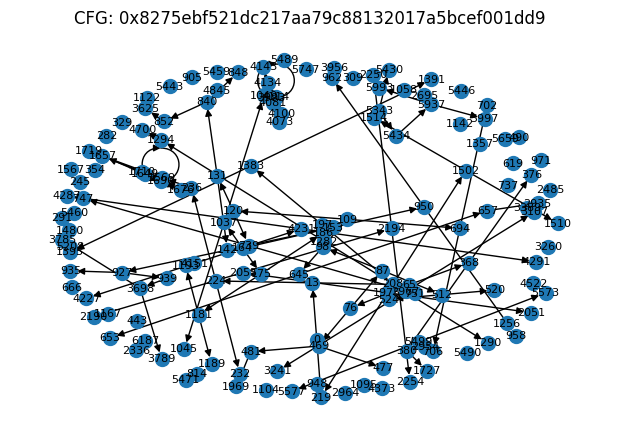

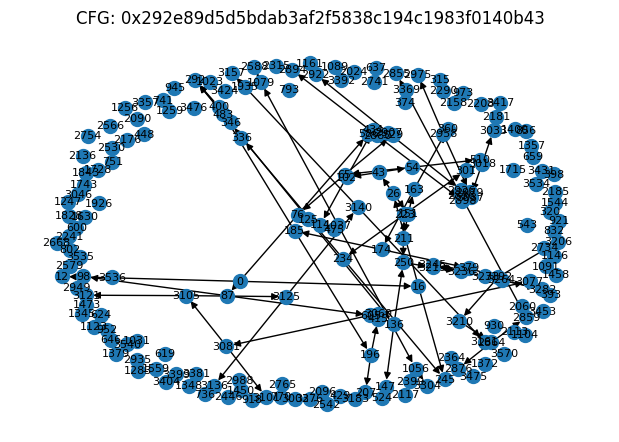

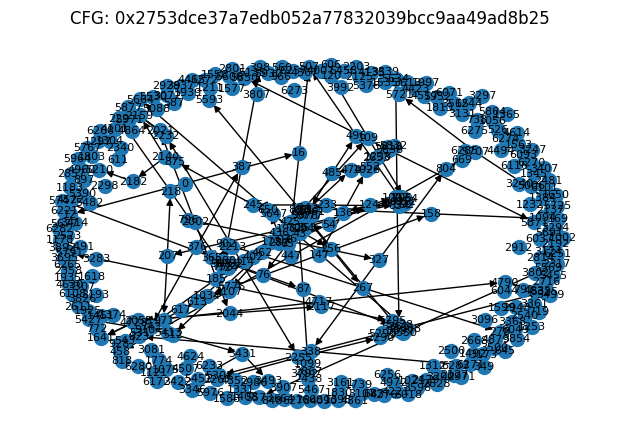

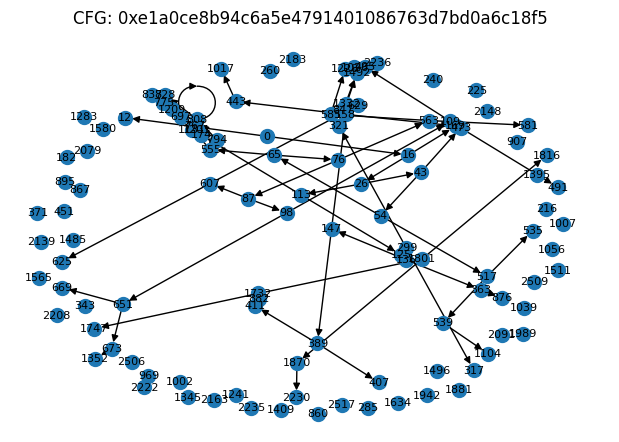

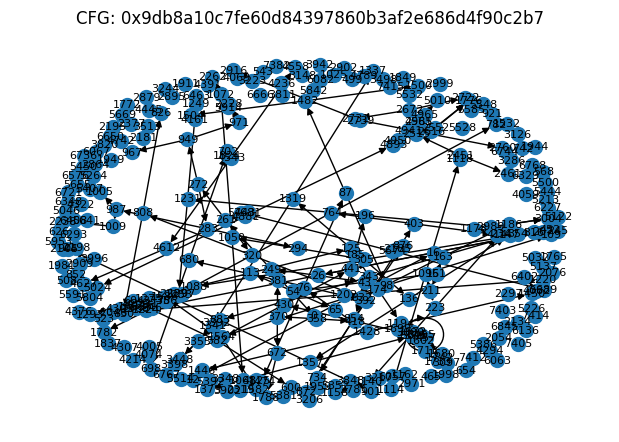

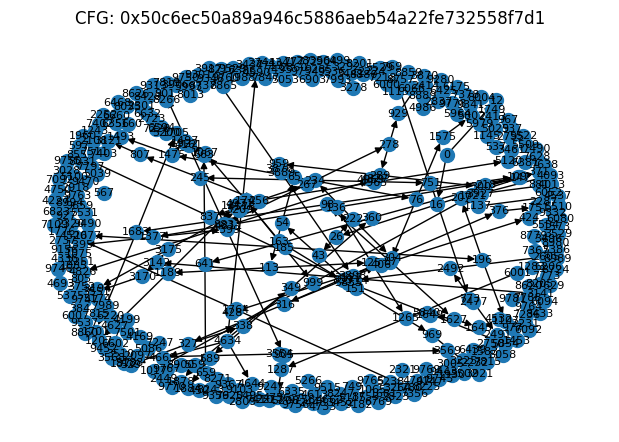

In [10]:
for i, (addr, graph) in enumerate(graphs.items()):
    plt.figure(figsize=(6, 4))
    nx.draw(graph, with_labels=True, node_size=100, font_size=8)
    plt.title(f"CFG: {addr}")
    plt.show()
    if i == 5:
        break

In [11]:
df = save_graph_features(LABEL_PATH, 'cfg', graphs)
df.head()

,Address,num_nodes,num_edges,avg_degree,density,connected_components,avg_clustering
0,0x8275ebf521dc217aa79c88132017a5bcef001dd9,155,118,1.522581,0.004943,44,0.000000
1,0x292e89d5d5bdab3af2f5838c194c1983f0140b43,194,96,0.989691,0.002564,112,0.012027
2,0x2753dce37a7edb052a77832039bcc9aa49ad8b25,339,178,1.050147,0.001553,192,0.003933
3,0xe1a0ce8b94c6a5e4791401086763d7bd0a6c18f5,113,78,1.380531,0.006163,46,0.000000
4,0x9db8a10c7fe60d84397860b3af2e686d4f90c2b7,303,211,1.392739,0.002306,122,0.007701


In [12]:
df.select_dtypes(include=['object'])

,Address
0,0x8275ebf521dc217aa79c88132017a5bcef001dd9
1,0x292e89d5d5bdab3af2f5838c194c1983f0140b43
2,0x2753dce37a7edb052a77832039bcc9aa49ad8b25
3,0xe1a0ce8b94c6a5e4791401086763d7bd0a6c18f5
4,0x9db8a10c7fe60d84397860b3af2e686d4f90c2b7
...,...
149,0xee45e37e2b73e86c709d9edd1c8ea3b0ec72dad3
150,0xb504035a11e672e12a099f32b1672b9c4a78b22f
151,0x5927b72440d8a8b8c6ca5a8be60e88975f9063fc
152,0xba751bff276907c438e927d2c2f18de574195e4b


## Transaction

In [ ]:
txn_df = save_txn_feature_dataframe(os.path.join(LABEL_PATH, 'txn'))

In [14]:
txn_df.head()

,txn_nums,event_nums,creation_block,creation_timestamp,start_block,end_block,life_time,start_time,end_time,duration_seconds,...,addauditor_num,createaudit_num,stake_num,rewardauditor_num,withdrawstake_num,slashstake_num,banauditor_num,owner_num,init_num,reward_num
Address,,,,,,,,,,,,,,,,,,,,,
0x50c6ec50a89a946c5886aeb54a22fe732558f7d1,0,0,0,0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0x6ce8b8eed077f9b49c1fa684008ebb7562bb41ad,7,0,4130922,1502170712,4130922.0,18030227.0,13899305.0,1.502171e+09,1.693433e+09,191261835.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0x530a9cceee0c45f58229ae5c256e414e6df957ad,8,4,5699952,1527642251,5699952.0,5700180.0,228.0,1.527642e+09,1.527646e+09,3250.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0xac4bf53936aedacbfd02c334be90bf2c79f063b9,610,0,5833931,1529666811,5833931.0,6144808.0,310877.0,1.529667e+09,1.534234e+09,4567419.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0xee45e37e2b73e86c709d9edd1c8ea3b0ec72dad3,0,0,0,0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
txn_df.select_dtypes(include=['object'])

""
Address
0x50c6ec50a89a946c5886aeb54a22fe732558f7d1
0x6ce8b8eed077f9b49c1fa684008ebb7562bb41ad
0x530a9cceee0c45f58229ae5c256e414e6df957ad
0xac4bf53936aedacbfd02c334be90bf2c79f063b9
0xee45e37e2b73e86c709d9edd1c8ea3b0ec72dad3
...
0x1e4402fa427a7a835fc64ea6d051404ce767a569
0x6f7ad850ef94320cb88f5ae66e5eb8244e81c949
0x1cf33ead073351b3fc63c1f4f35dc10791fe6c7c


In [16]:
txn_df["buy_amt"].map(type).value_counts()

buy_amt
<class 'float'>    156
Name: count, dtype: int64

In [17]:
txn_df.isnull().sum().sort_values(ascending=False)

reward_num            0
txn_nums              0
event_nums            0
creation_block        0
creation_timestamp    0
                     ..
min_gas_used          0
std_gas_used          0
avg_gas_price         0
max_gas_price         0
min_gas_price         0
Length: 278, dtype: int64

In [18]:
txn_df.to_csv(os.path.join(LABEL_PATH, 'transaction_feature.csv'))

### Graphs

In [19]:
graphs = generate_transaction_graphs(os.path.join(LABEL_PATH, 'txn'))

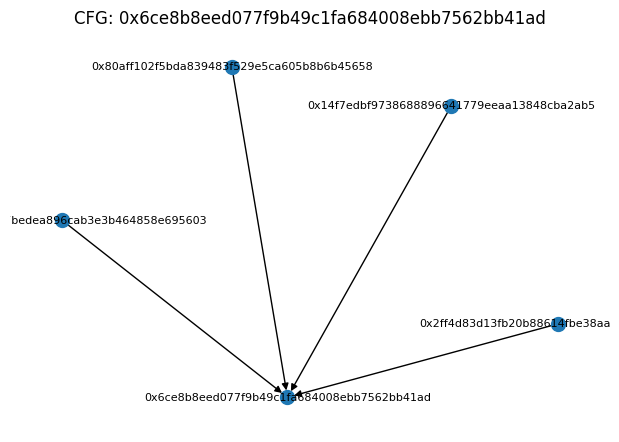

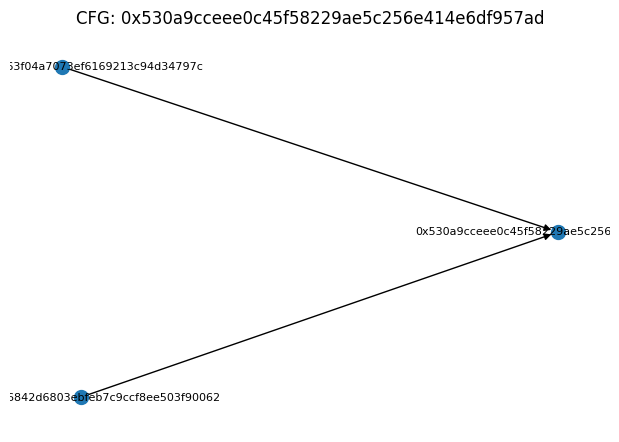

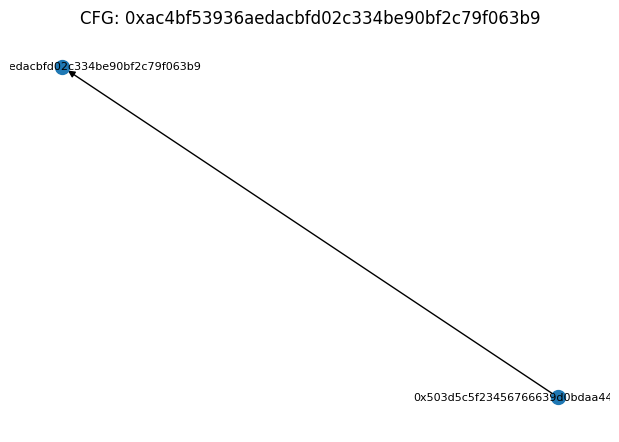

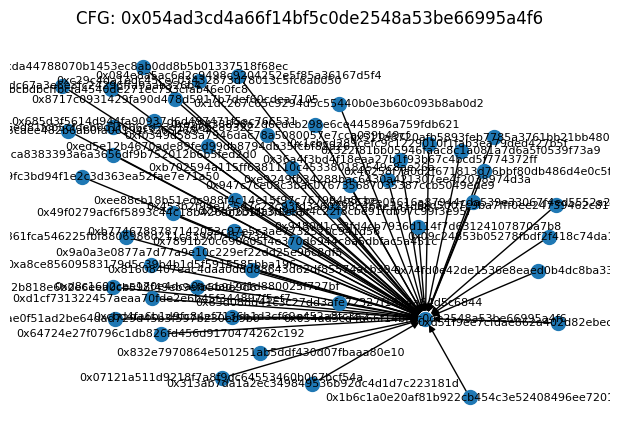

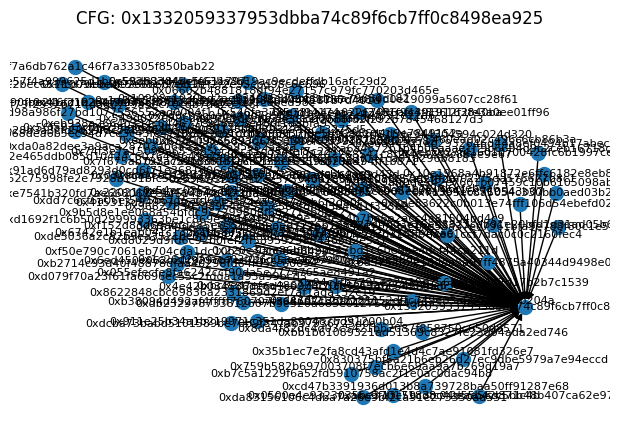

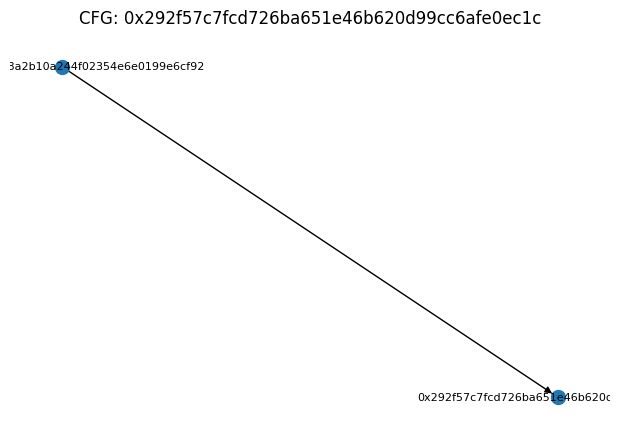

In [20]:
for i, (addr, graph) in enumerate(graphs.items()):
    plt.figure(figsize=(6, 4))
    nx.draw(graph, with_labels=True, node_size=100, font_size=8)
    plt.title(f"CFG: {addr}")
    plt.show()
    if i == 5:
        break

In [21]:
df = save_graph_features(LABEL_PATH, 'txn', graphs)
df.head()

,Address,num_nodes,num_edges,avg_degree,density,connected_components,avg_clustering
0,0x6ce8b8eed077f9b49c1fa684008ebb7562bb41ad,5,4,1.600000,0.200000,1,0.0
1,0x530a9cceee0c45f58229ae5c256e414e6df957ad,3,2,1.333333,0.333333,1,0.0
2,0xac4bf53936aedacbfd02c334be90bf2c79f063b9,2,1,1.000000,0.500000,1,0.0
3,0x054ad3cd4a66f14bf5c0de2548a53be66995a4f6,51,50,1.960784,0.019608,1,0.0
4,0x1332059337953dbba74c89f6cb7ff0c8498ea925,96,95,1.979167,0.010417,1,0.0


## Solidity

In [22]:
tf_idf_df, _ = build_sol_feature_dataframe(os.path.join(LABEL_PATH, 'sol'), MODEL_PATH)

In [23]:
tf_idf_df.head()

,spdx,license,identifier,mit,pragma,solidity,0,6,12,import,...,amountafter,initializable,initializer,initializing,_fallback,returndatasize,amounttoswap,isfeeexempt,istxlimitexempt,feeamounts
Address,,,,,,,,,,,,,,,,,,,,,
0xa0ffc741f109159ee203424a299e6d2731dcfc76,0.151948,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.004452,0.000000,0.0,...,0.026918,0.0,0.0,0.0,0.0,0.008630,0.008555,0.0,0.0,0.087548
0x85aa3f04e539e426cbb55c0d584ea99cfe1d96a1,0.079905,0.0,0.011904,0.0,0.006792,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.050117
0x4a7babfafe46456bc4e965d6fbeaff7f01c8b330,0.010912,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044184,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.043418,0.0,0.0,0.000000
0x0290ea3c728981725689187763f6c63a68e192b8,0.020917,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.013871,0.0,0.0,0.000000
0x292f57c7fcd726ba651e46b620d99cc6afe0ec1c,0.083840,0.0,0.031037,0.0,0.000000,0.006338,0.0,0.000000,0.000000,0.0,...,0.013631,0.0,0.0,0.0,0.0,0.005099,0.005054,0.0,0.0,0.126582


In [24]:
tf_idf_df.select_dtypes(include=['object'])

""
Address
0xa0ffc741f109159ee203424a299e6d2731dcfc76
0x85aa3f04e539e426cbb55c0d584ea99cfe1d96a1
0x4a7babfafe46456bc4e965d6fbeaff7f01c8b330
0x0290ea3c728981725689187763f6c63a68e192b8
0x292f57c7fcd726ba651e46b620d99cc6afe0ec1c
...
0x4165084a6e5388ce53c9d9892f904a2712dd943a
0x831467b7b6bf9c705dc87899d48b57ee55c8d5cc
0x1250b98cbde9f99f4c42dcdacee193221f17eb50


In [25]:
tf_idf_df.to_csv(os.path.join(LABEL_PATH, 'tf_idf.csv'))